In [195]:
import pandas as pd
import numpy as np

#Implement a KNN model to classify the animals in to categorie

In [196]:
from google.colab import files
uploaded=files.upload()

Saving Zoo.csv to Zoo (1).csv


#EDA

In [198]:
data=pd.read_csv('Zoo.csv')
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [199]:
data.shape

(101, 18)

In [200]:
len(data['animal name'].unique())

100

In [201]:
data['animal name'].value_counts()         # frog is repeated twice in given dataset

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [202]:
data[data['animal name']=='frog']           #1 frog being venomous and other frog being non venomous

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [203]:
data.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [204]:
data.duplicated().sum()

0

In [205]:
data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [206]:
data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [207]:
data['hair'].unique()

array([1, 0])

In [208]:
data['feathers'].unique()

array([0, 1])

In [209]:
data['eggs'].unique()

array([0, 1])

In [210]:
data['milk'].unique()

array([1, 0])

In [211]:
data['airborne'].unique()

array([0, 1])

In [212]:
data['aquatic'].unique()

array([0, 1])

In [213]:
data['predator'].unique()

array([1, 0])

In [214]:
data['toothed'].unique()

array([1, 0])

In [215]:
data['backbone'].unique()

array([1, 0])

In [216]:
data['breathes'].unique()

array([1, 0])

In [217]:
data['venomous'].unique()

array([0, 1])

In [218]:
data['fins'].unique()

array([0, 1])

In [219]:
data['legs'].unique()

array([4, 0, 2, 6, 8, 5])

In [220]:
data['tail'].unique()

array([0, 1])

In [221]:
data['domestic'].unique()

array([0, 1])

In [222]:
data['catsize'].unique()

array([1, 0])

In [223]:
data['type'].unique()      # types of animal categories are there in the given dataset

array([1, 4, 2, 7, 6, 5, 3])

In [224]:
data[data['type']==1]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1
10,cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
17,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
19,dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1,1


In [225]:
len(data[data['type']==1])

41

In [226]:
data[data['type']==2]           # birds belong to type2

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
11,chicken,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
16,crow,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
20,dove,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0,2
21,duck,0,1,1,0,1,1,0,0,1,1,0,0,2,1,0,0,2
23,flamingo,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,1,2
33,gull,0,1,1,0,1,1,1,0,1,1,0,0,2,1,0,0,2
37,hawk,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0,2
41,kiwi,0,1,1,0,0,0,1,0,1,1,0,0,2,1,0,0,2
43,lark,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0,2
56,ostrich,0,1,1,0,0,0,0,0,1,1,0,0,2,1,0,1,2


In [227]:
len(data[data['type']==2])

20

In [228]:
data[data['type']==3]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
62,pitviper,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3
76,seasnake,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,3
80,slowworm,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3
90,tortoise,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1,3
91,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3


In [229]:
len(data[data['type']==3])

5

In [230]:
data[data['type']==4]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
12,chub,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
18,dogfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
34,haddock,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4
38,herring,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
60,pike,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,1,4
61,piranha,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
73,seahorse,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,4


In [231]:
len(data[data['type']==4])

13

In [232]:
data[data['type']==5]    # egg=1, aquatic=1, legs=4, backbone=1, breathes=1 imp features

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5
52,newt,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,5
89,toad,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0,5


In [233]:
data[data['type']==6]       #legs=6 imp feature

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
24,flea,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
30,gnat,0,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
39,honeybee,1,0,1,0,1,0,0,0,0,1,1,0,6,0,1,0,6
40,housefly,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
42,ladybird,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0,6
51,moth,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0,6
88,termite,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,6
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6


In [234]:
len(data[data['type']==6])

8

In [235]:
data[data['type']==7]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
13,clam,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7
14,crab,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0,7
15,crayfish,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
46,lobster,0,0,1,0,0,1,1,0,0,0,0,0,6,0,0,0,7
53,octopus,0,0,1,0,0,1,1,0,0,0,0,0,8,0,0,1,7
72,scorpion,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0,7
77,seawasp,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,7
81,slug,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
85,starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [236]:
len(data[data['type']==7])

10

#Visualization

In [237]:
data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

<Axes: xlabel='type'>

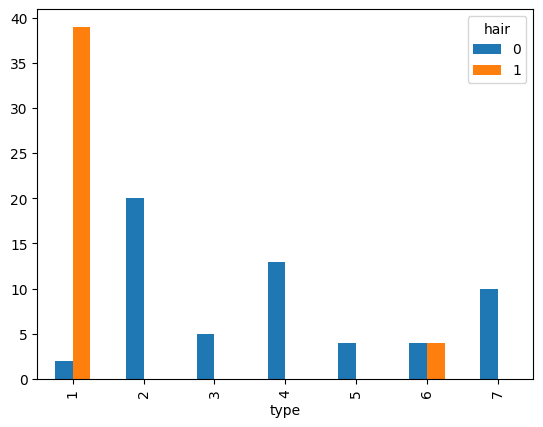

In [238]:
pd.crosstab( data['type'], data['hair']).plot(kind='bar')

<Axes: xlabel='type'>

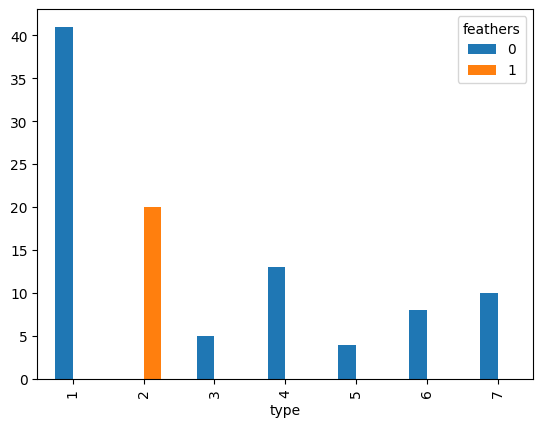

In [239]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.crosstab( data['type'], data['feathers']).plot(kind='bar')         #feathers=1 is unique to type 2 animal category

<Axes: xlabel='type'>

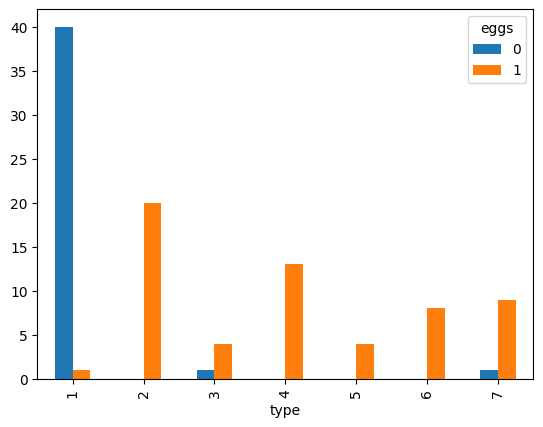

In [240]:
pd.crosstab( data['type'], data['eggs']).plot(kind='bar')

<Axes: xlabel='type'>

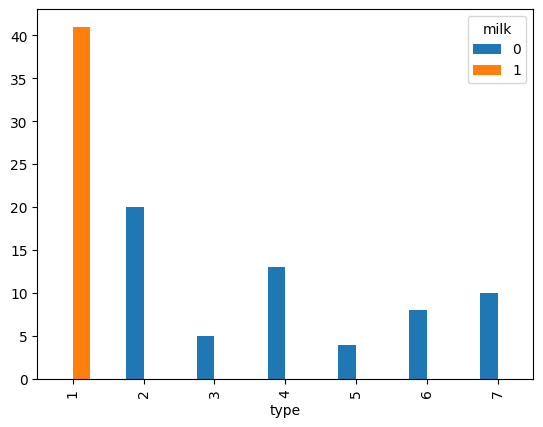

In [241]:
pd.crosstab( data['type'], data['milk']).plot(kind='bar') #milk =1 is only for type 1 category

<Axes: xlabel='type'>

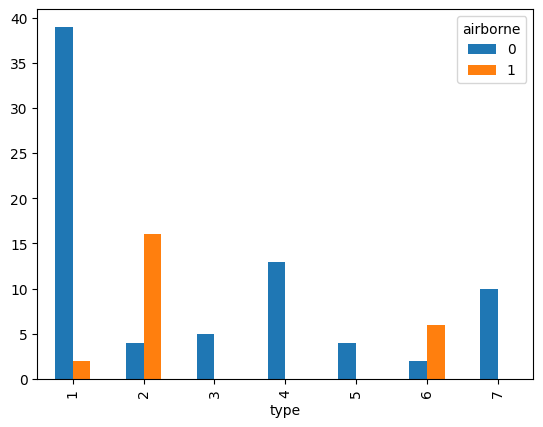

In [242]:
pd.crosstab( data['type'], data['airborne']).plot(kind='bar')

<Axes: xlabel='type'>

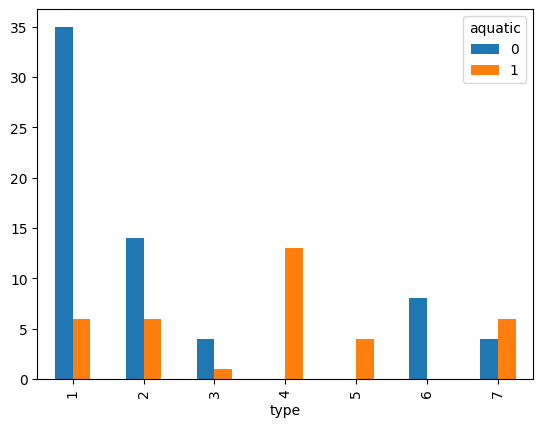

In [243]:
pd.crosstab( data['type'], data['aquatic']).plot(kind='bar')

<Axes: xlabel='type'>

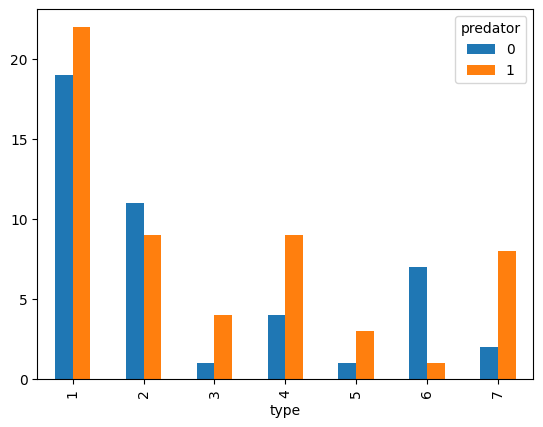

In [244]:
pd.crosstab( data['type'], data['predator']).plot(kind='bar')

<Axes: xlabel='type'>

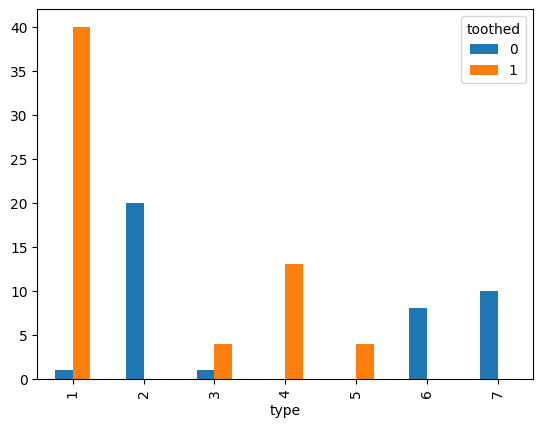

In [245]:
pd.crosstab( data['type'], data['toothed']).plot(kind='bar')

In [246]:
data.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

<Axes: xlabel='type'>

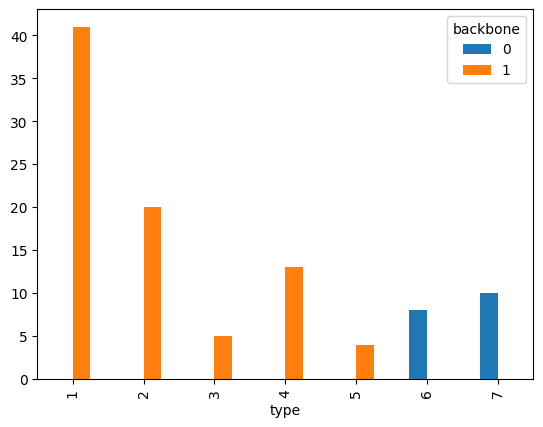

In [247]:
pd.crosstab( data['type'], data['backbone']).plot(kind='bar') #type 6 and 7 lacks backbone

<Axes: xlabel='type'>

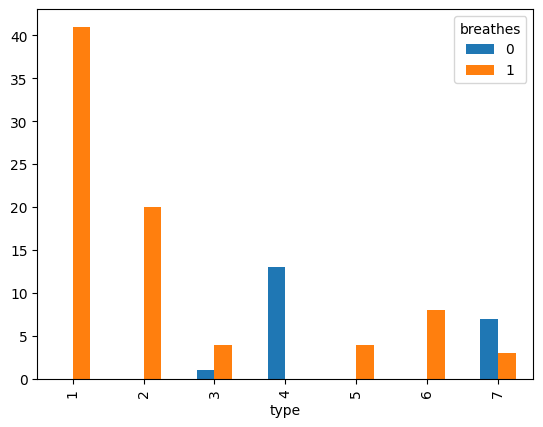

In [248]:
pd.crosstab( data['type'], data['breathes']).plot(kind='bar')

<Axes: xlabel='type'>

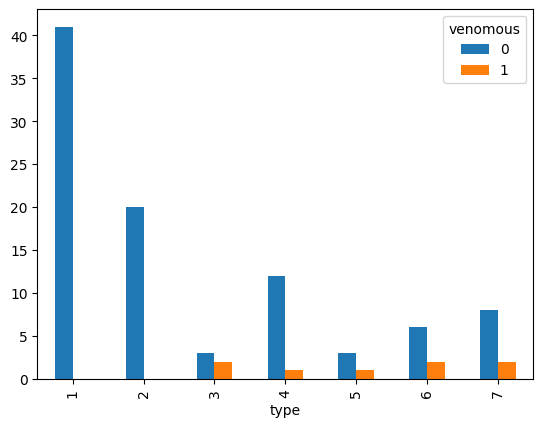

In [249]:
pd.crosstab( data['type'], data['venomous']).plot(kind='bar')      #type 1 and type 2 are non-venomous

<Axes: xlabel='type'>

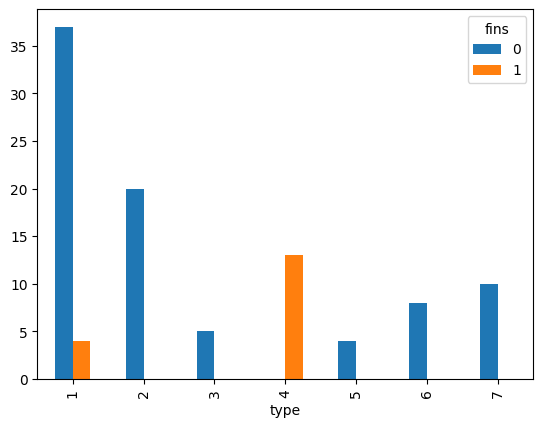

In [250]:
pd.crosstab( data['type'], data['fins']).plot(kind='bar')   #type 4 category animals have fins

<Axes: xlabel='type'>

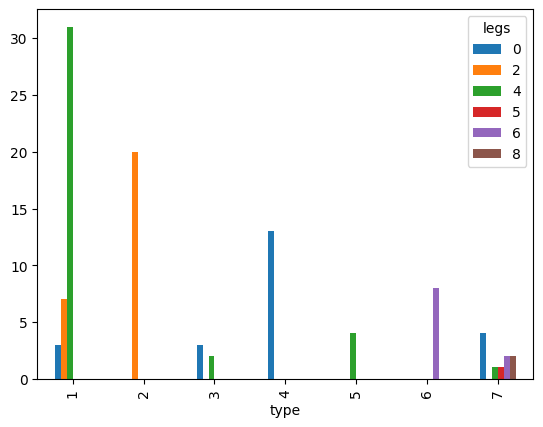

In [251]:
pd.crosstab( data['type'], data['legs']).plot(kind='bar')

<Axes: xlabel='type'>

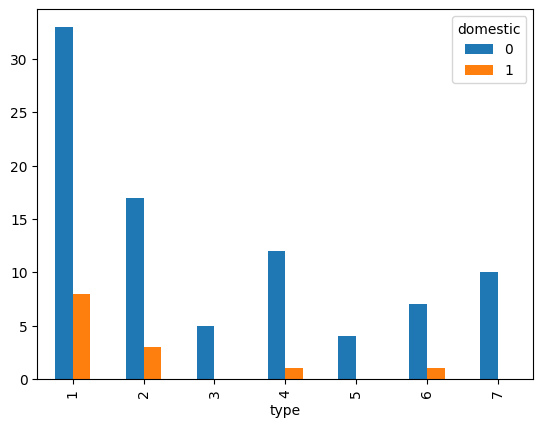

In [252]:
pd.crosstab( data['type'], data['domestic']).plot(kind='bar')

<Axes: xlabel='type'>

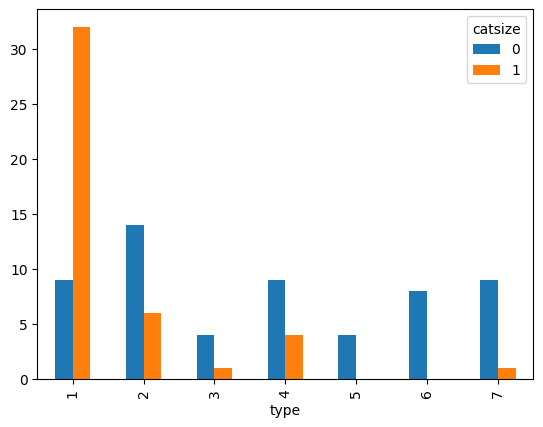

In [253]:
pd.crosstab( data['type'], data['catsize']).plot(kind='bar')

<Axes: ylabel='type'>

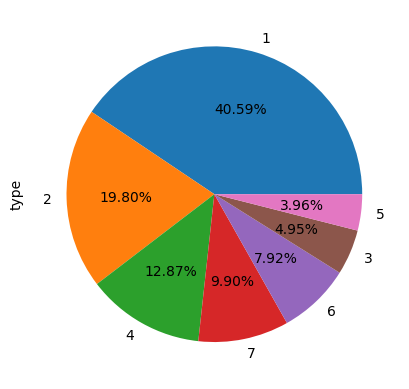

In [254]:
data['type'].value_counts().plot(kind='pie', autopct='%1.2f%%')

<Axes: ylabel='legs'>

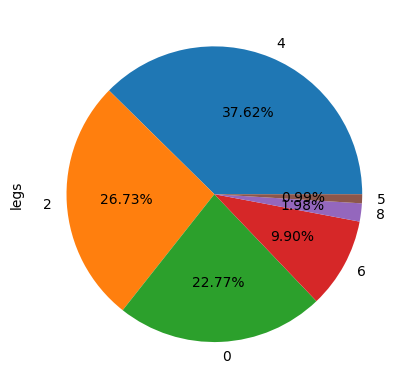

In [255]:
data['legs'].value_counts().plot(kind='pie', autopct='%1.2f%%')

#model building

In [256]:
#GridSearchCV for hyper-parameter tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [257]:
X=data.iloc[:, 1:-1]
Y=data['type']

In [258]:
X.head(1)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1


In [259]:
Y.head()

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [260]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [261]:
X_train.shape

(80, 16)

In [262]:
Y_train.shape

(80,)

In [263]:
X_test.shape

(21, 16)

In [264]:
Y_test.shape

(21,)

In [265]:
Y_test

28    1
49    1
85    7
56    2
46    7
47    1
83    2
1     1
95    2
73    4
61    4
10    1
58    2
36    1
90    3
19    1
25    5
34    4
70    1
17    1
14    7
Name: type, dtype: int64

#hyper-parameter tuning

In [266]:
n_neighbors=np.array(range(1,40))
param_grid=dict(n_neighbors=n_neighbors)
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid )
grid.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [267]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 1}
0.9625


In [268]:
#with number of neighbors =1
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, Y_train)
pred_train=model.predict(X_train)

In [269]:
result=np.mean(Y_train==pred_train)
result

1.0

In [270]:
pred_test=model.predict(X_test)
result_test=np.mean(Y_test==pred_test)
result_test

0.9523809523809523

In [271]:
#when number of neighbors =2
model2=KNeighborsClassifier(n_neighbors=2)
model2.fit(X_train, Y_train)
pred_train2 =model2.predict(X_train)

In [272]:
result2=np.mean(Y_train==pred_train2)
result2

0.975

In [273]:
pred_test2=model2.predict(X_test)
result_test2=np.mean(Y_test==pred_test2)
result_test2

0.8095238095238095

In [274]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
classification_report=classification_report(Y_test, pred_test)
print(classification_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       0.50      1.00      0.67         1
           7       1.00      0.67      0.80         3

    accuracy                           0.95        21
   macro avg       0.92      0.94      0.91        21
weighted avg       0.98      0.95      0.96        21



#evaluating model using cross validation

In [275]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model=KNeighborsClassifier(n_neighbors=1)
kfold=KFold(n_splits=10)
results=cross_val_score(model, X_train,Y_train, cv=kfold)
results


array([1.   , 1.   , 0.875, 0.875, 1.   , 1.   , 1.   , 0.875, 1.   ,
       0.875])

In [276]:
results.mean()*100

95.0

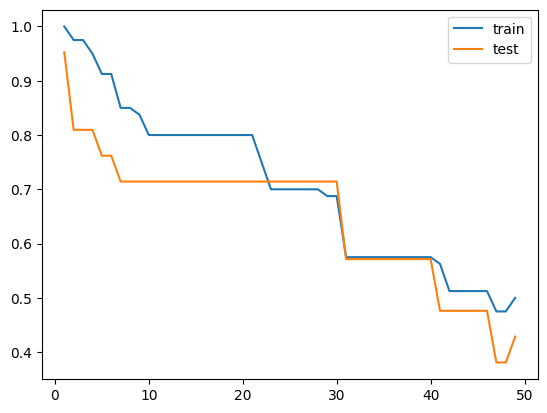

In [277]:
# Visualizing result
acc=[]
for i in range(1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, Y_train)
  train_acc=np.mean(Y_train==knn.predict(X_train))
  test_acc=np.mean(Y_test==knn.predict(X_test))
  acc.append([train_acc, test_acc])

#train_accuracy plot
plt.plot(range(1,50), [i[0] for i in acc])
plt.plot(range(1,50), [i[1] for i in acc])
plt.legend(['train','test'])

In [278]:
# with increase in number of neighbors the accuracy decreased

#Prepare a model for glass classification using KNN

In [279]:
from google.colab import files
uploaded=files.upload()

Saving glass.csv to glass (1).csv


In [280]:
data=pd.read_csv('glass.csv')

#EDA

In [281]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [282]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [283]:
data.shape

(214, 10)

In [284]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [285]:
data.duplicated().sum()

1

In [286]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [287]:
data[(data['RI']==1.52213) & (data['Na']==14.21)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [288]:
data.drop_duplicates(inplace=True)

In [289]:
data.duplicated().sum()

0

In [290]:
data['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [291]:
data['Type'].value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [292]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


##visualization

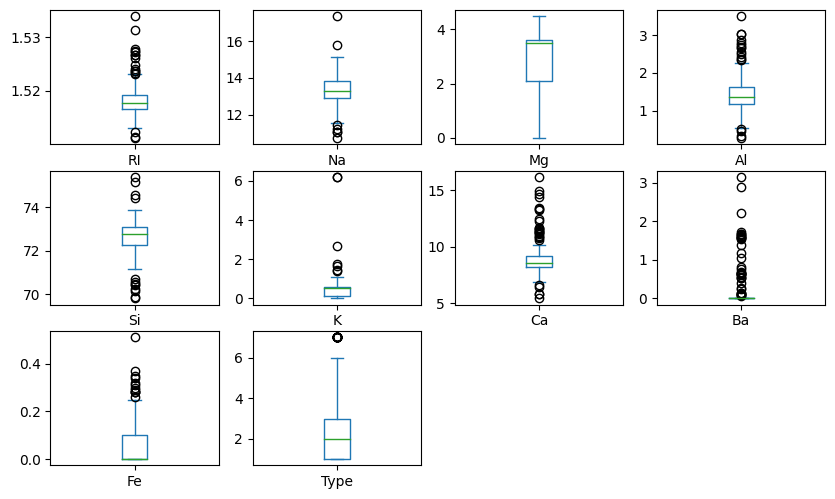

In [293]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
data.plot(kind='box', subplots=True, layout=(4,4), figsize=(10,8))
plt.show()

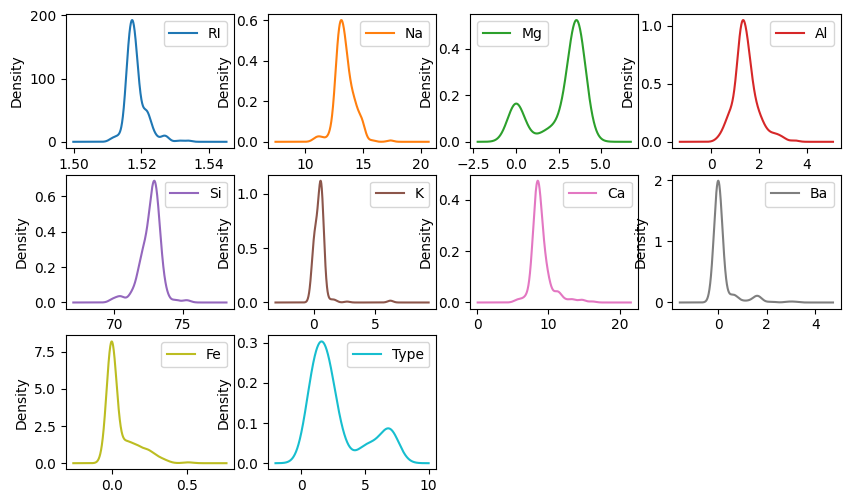

In [294]:
data.plot(kind='density', subplots=True, layout=(4,4),figsize=(10,8), sharex=False)
plt.show()

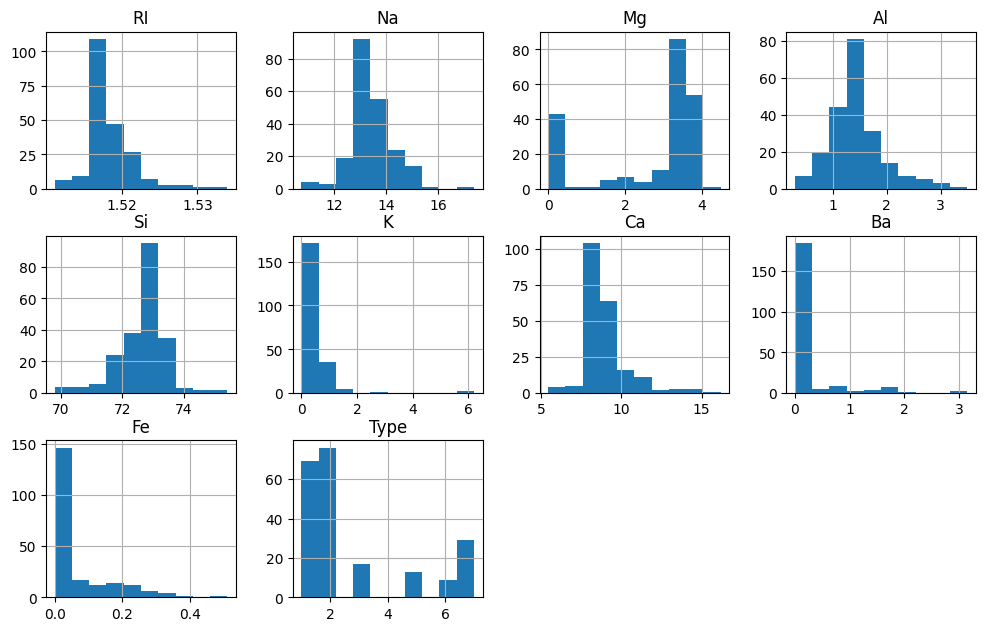

In [295]:
data.hist(figsize=(12,10), layout=(4,4))
plt.show();

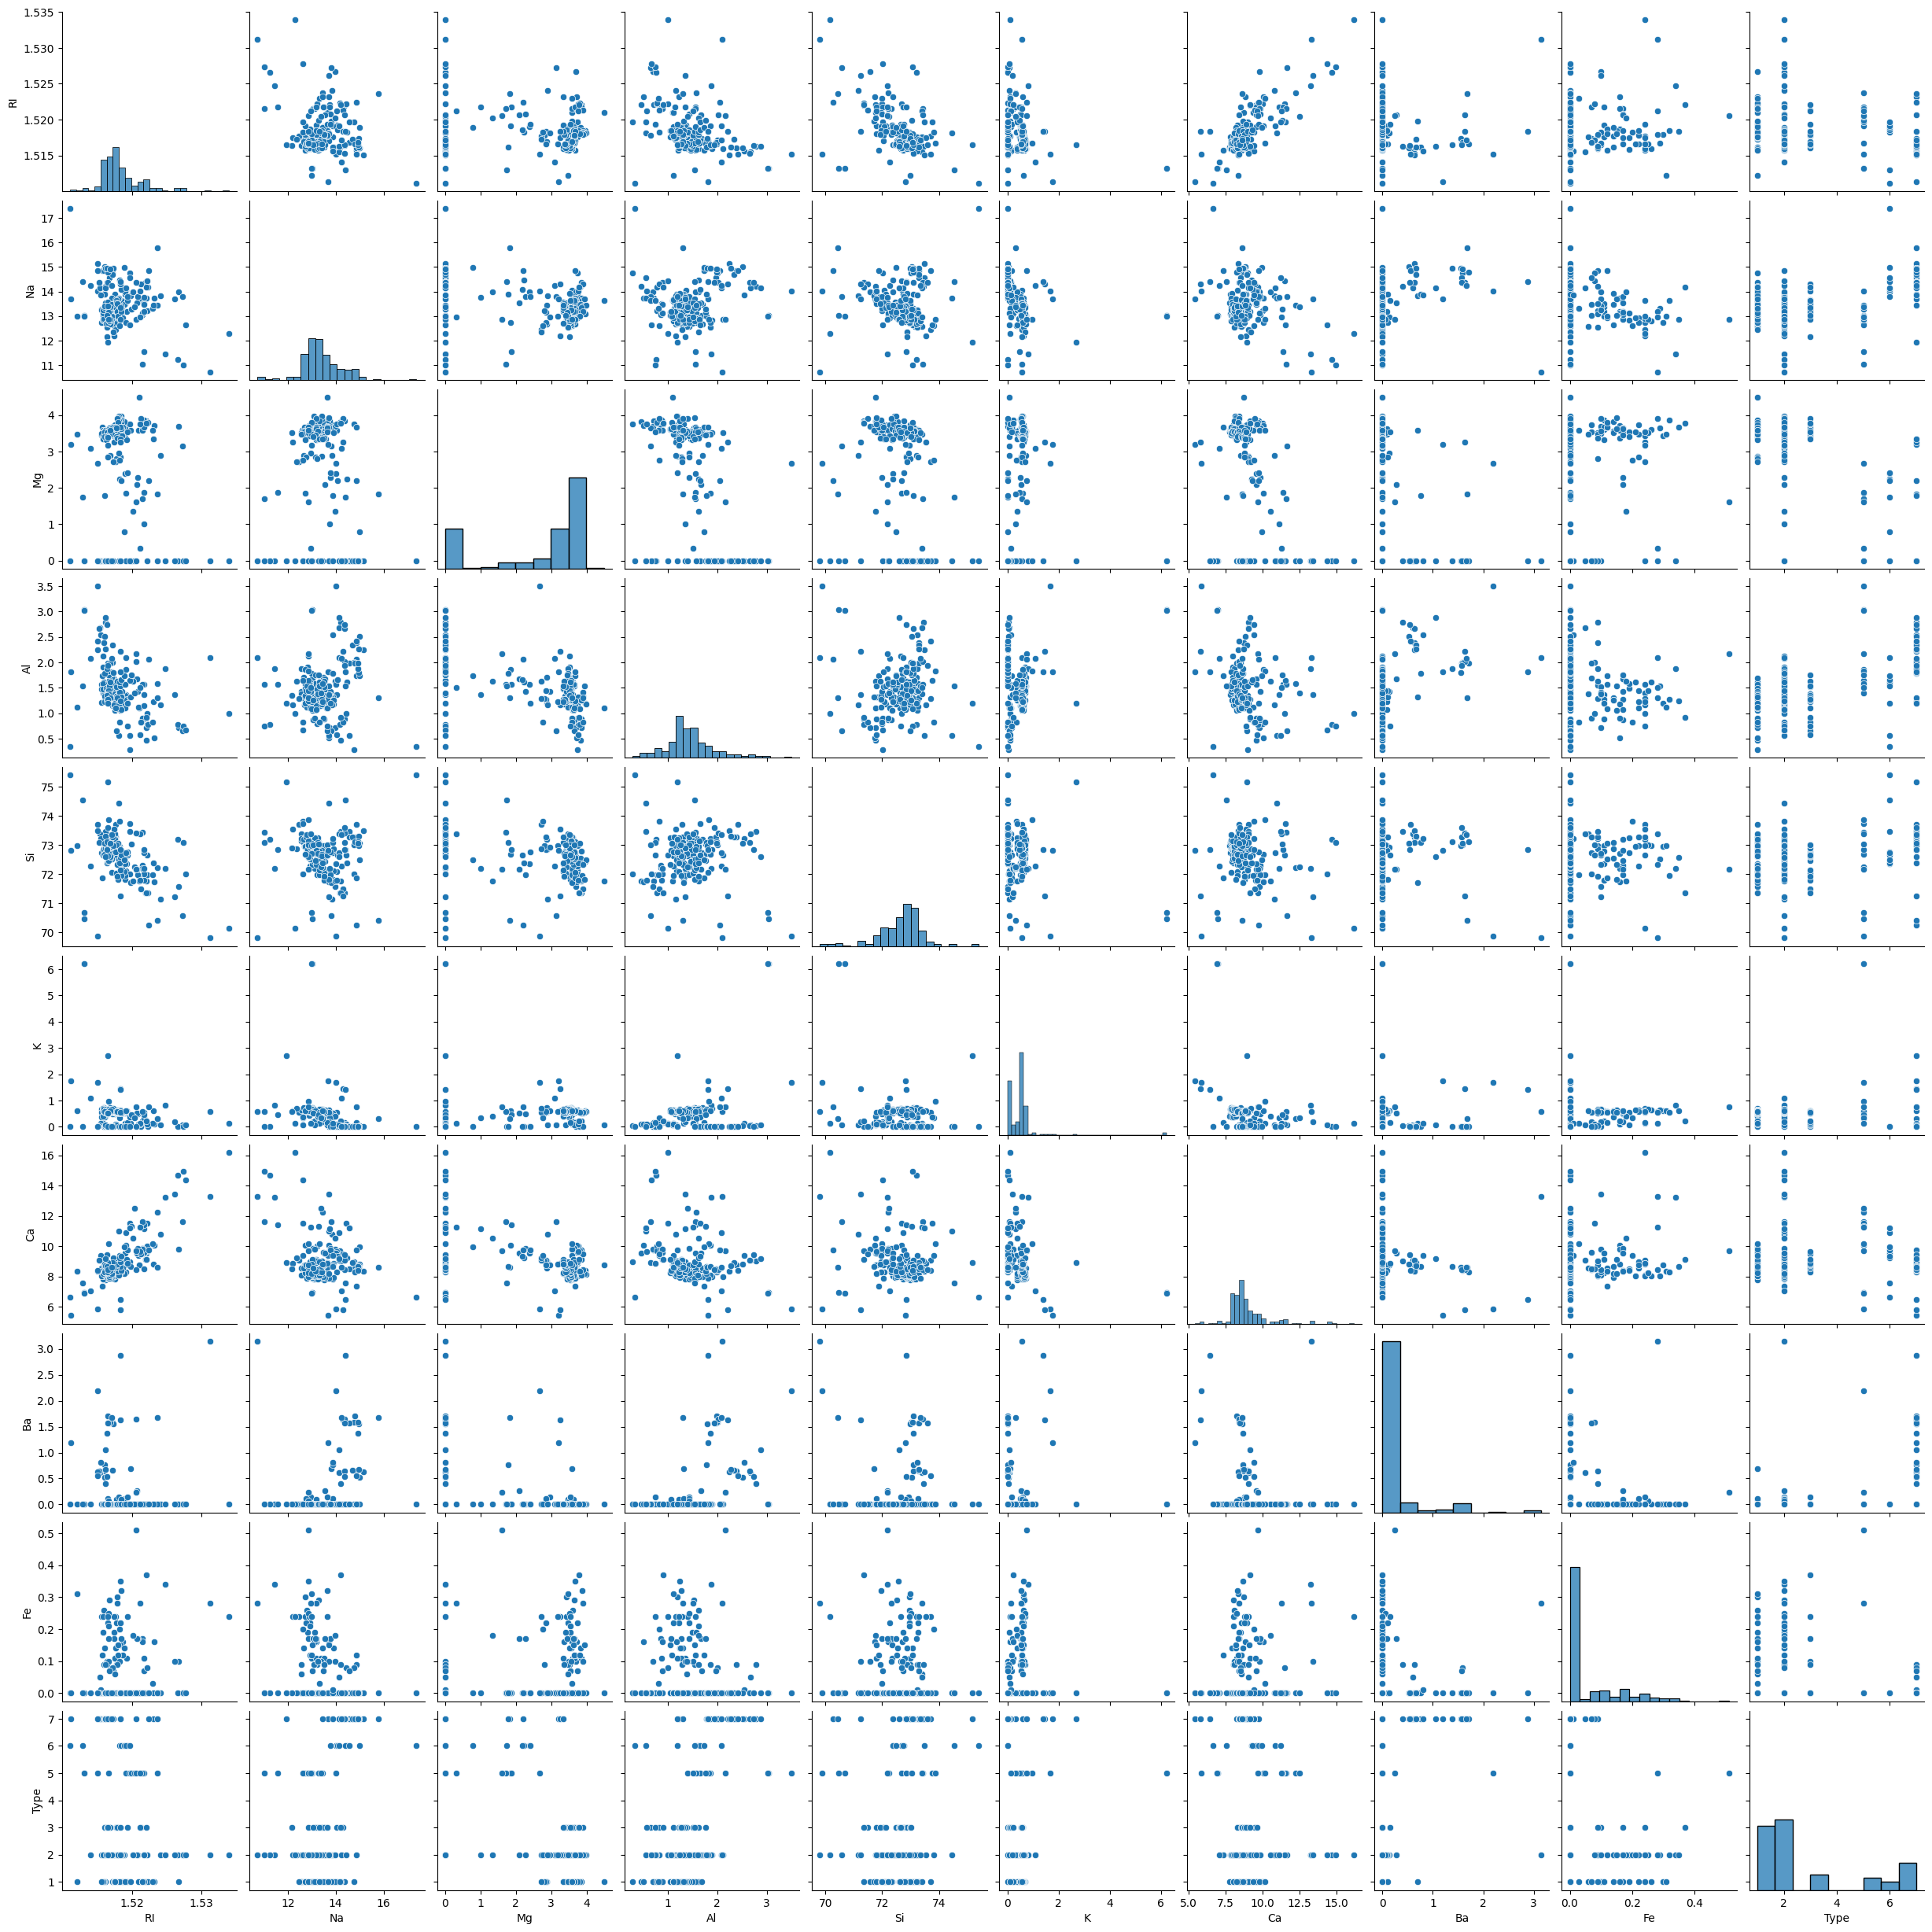

In [296]:
sns.pairplot(data)

<Axes: ylabel='Type'>

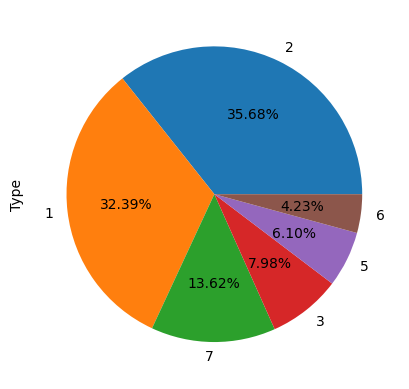

In [297]:
data['Type'].value_counts().plot(kind='pie', autopct='%1.2f%%')

#Model Building

In [298]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [299]:
scaler=StandardScaler()
X=scaler.fit_transform(data.drop('Type', axis=1))

In [300]:
X

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [301]:
X.shape

(213, 9)

In [302]:
Y=data['Type']

In [303]:
Y.shape

(213,)

In [304]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=0)

In [305]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=np.array(range(1,50))
param_grid=dict(n_neighbors=n_neighbors)
model= KNeighborsClassifier()
grid=GridSearchCV(model, param_grid=param_grid)
grid.fit(X_train, Y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [306]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 1}
0.7


In [307]:
model_train= KNeighborsClassifier(n_neighbors=1)
model_train.fit(X_train, Y_train)
pred_train=model_train.predict(X_train)
result_train=np.mean(Y_train==pred_train)
result_train

1.0

In [308]:
pred_test=model_train.predict(X_test)
result_test=np.mean(Y_test==pred_test)
result_test

0.6511627906976745

In [309]:
from sklearn.metrics import classification_report
classification_report=classification_report(Y_test, pred_test)
print(classification_report)

              precision    recall  f1-score   support

           1       0.56      1.00      0.72         9
           2       0.63      0.67      0.65        18
           3       0.50      0.17      0.25         6
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         2
           7       1.00      0.83      0.91         6

    accuracy                           0.65        43
   macro avg       0.62      0.53      0.53        43
weighted avg       0.64      0.65      0.61        43



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#model validation

In [310]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model=KNeighborsClassifier(n_neighbors=1)
kfold=KFold(n_splits=10)
result=cross_val_score(model,X_train, Y_train, cv=kfold)
result.mean()*100

70.0

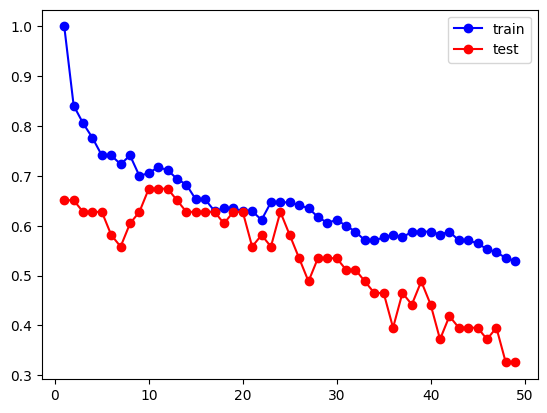

In [311]:
acc=[]
for i in range(1,50):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, Y_train)
  train_acc=np.mean(Y_train==knn.predict(X_train))
  test_acc=np.mean(Y_test==knn.predict(X_test))
  acc.append([train_acc, test_acc])

plt.plot(range(1,50), [i[0] for i in acc], 'bo-')
plt.plot(range(1,50), [i[1] for i in acc],'ro-')
plt.legend(['train','test'])

In [312]:
# test accuracy is 65%
#when n_neighbors=10
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, Y_train)
pred=knn.predict(X_test)
res=np.mean(Y_test==pred)
res           # from plot and by calculation it is found that the test accuracy incraeses from 65% to 67% when n_neighbors=10

0.6744186046511628

# Feature Engineering

In [313]:
from sklearn.feature_selection import SelectKBest, f_classif
selector=SelectKBest(score_func=f_classif, k=5)
X_train_selected=selector.fit_transform(X_train, Y_train)

In [314]:
X_train_selected.shape

(170, 5)

In [315]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train_selected, Y_train)
pred_train=model.predict(X_train_selected)
result=np.mean(Y_train==pred_train)
result             #with increasing number of neighbors the accuracy is decreasing

1.0

In [316]:
#predicting for X_test
selector=SelectKBest(score_func=f_classif, k=5)
X_test_selected=selector.fit_transform(X_test, Y_test)

In [317]:
X_test_selected.shape

(43, 5)

In [318]:
model_test=KNeighborsClassifier(n_neighbors=1)
model_test.fit(X_train_selected, Y_train)
pred_test=model_test.predict(X_test_selected)

In [319]:
result_test=np.mean(Y_test==pred_test)
result_test

0.6046511627906976

In [320]:
#  after performing feature selection the test accuracy decreased from 65% to 60%